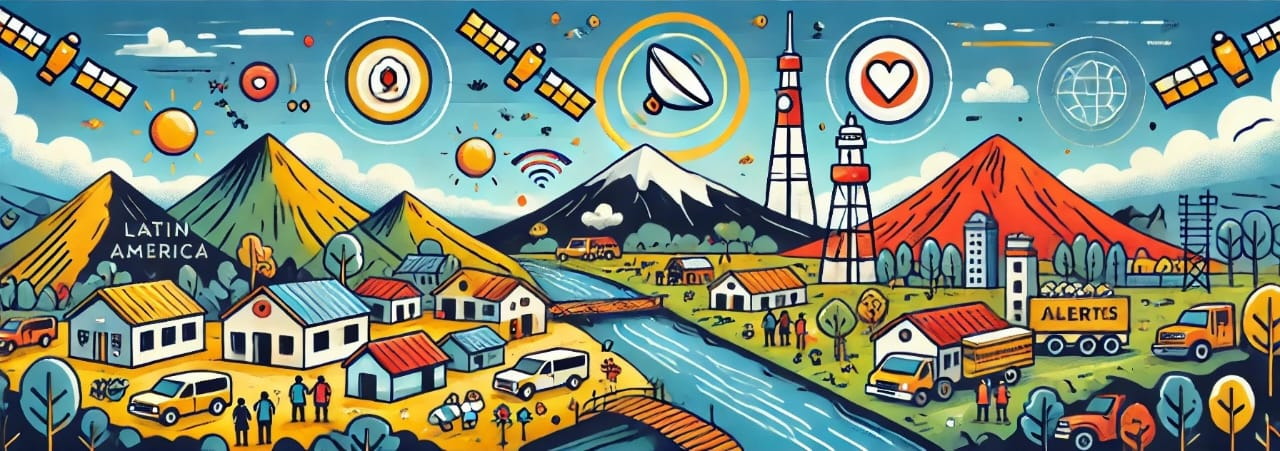

 # Riesgo de Deslizamientos

En muchas regiones tropicales de América Latina, las intensas lluvias y el terreno montañoso incrementan el riesgo de deslizamientos de tierra y bloqueos en las carreteras. Estas precipitaciones, aunque vitales para mantener la vegetación y la fertilidad del suelo, también representan un factor de inestabilidad geológica que afecta la infraestructura y la seguridad de las comunidades.

Este notebook en Python tiene como objetivo desarrollar una metodología de análisis de riesgo de deslizamientos de tierra, aplicable en zonas vulnerables de LATAM. Para ilustrar el proceso, se utilizan datos específicos de Guápiles, Costa Rica, como ejemplo representativo. Las tareas técnicas que se abordan incluyen:

**Preprocesamiento y combinación de datos:** Integrar datos satelitales (como NDVI, pendiente, y humedad del suelo) con fotoreportes de la comunidad, formando un conjunto de datos completo para análisis.

**Visualización interactiva de resultados:** Generar un mapa interactivo que muestre las áreas en riesgo, permitiendo una visualización geográfica que facilita la toma de decisiones.

Este notebook proporciona una metodología replicable para otras regiones de LATAM, permitiendo a las comunidades locales anticiparse a deslizamientos y gestionar riesgos de manera proactiva. El ejemplo de Guápiles ilustra cómo esta herramienta puede ser implementada en áreas vulnerables, mejorando la planificación y seguridad ante amenazas naturales.

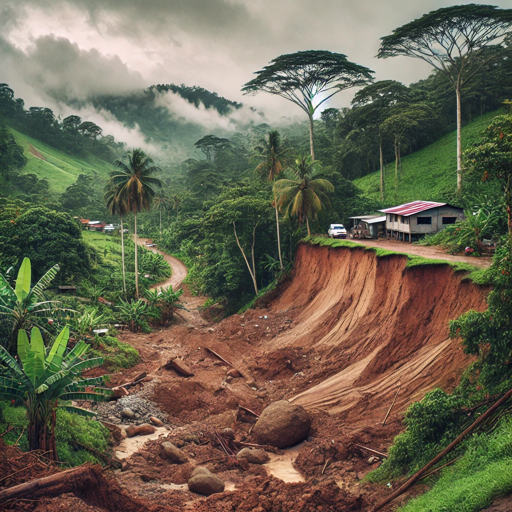

In [61]:
#Importamos imagen
from PIL import Image

# Open the generated image and resize it to a smaller version
image_path = 'C:/Users/user/Challenges/Copernicus/Desli.png'
output_path = 'C:/Users/user/Challenges/Copernicus/Desli.png'

# Open and resize the image to 512x512 pixels
with Image.open(image_path) as img:
    img_resized = img.resize((512, 512))
    img_resized.save(output_path)

img

Los deslizamientos de tierra son fenómenos naturales que pueden causar daños significativos a comunidades e infraestructuras. En América Latina, los desastres relacionados con **deslizamientos** representan cerca del **10%** de todos los eventos naturales en la región. Se estima que el 90% de los deslizamientos en los últimos años fueron desencadenados por lluvias intensas, mientras que alrededor del 15% estuvieron directamente relacionados con huracanes y tormentas tropicales, especialmente en áreas de Centroamérica y el Caribe​ NHESS​ CLIMATE ATTRIBUTION .

Este notebook utiliza datos satelitales de Copernicus y reportes locales para crear un modelo de predicción de riesgo de deslizamientos, ayudando a comunidades vulnerables a anticipar estos eventos y reducir sus impactos.

**AlertaLATAM**, en combinación con los datos satelitales de **Copernicus**, utiliza un sistema de **Inteligencia Híbrida para la Gestión Integral de Desastres** que transforma la experiencia de las comunidades al ofrecerles un sistema de alerta y preparación ante desastres personalizado y basado en datos precisos. Este sistema combina datos satelitales y aportes comunitarios, generando alertas y análisis predictivos que se adaptan a la situación específica de la comunidad, en este caso, situada en Guápiles.

A través de AlertaLATAM, la ciudadanía recibe notificaciones en tiempo real sobre riesgos de deslizamientos de tierra, algo crucial en esta región, donde las lluvias intensas y el terreno inclinado aumentan la probabilidad de estos eventos. Los datos satelitales de Copernicus, como los **índices** de **humedad del suelo, la cobertura vegetal (NDVI) y la topografía**, permiten identificar áreas de alto riesgo, especialmente en terrenos deforestados o saturados de agua. Estos datos se integran con los informes de la comunidad, donde los vecinos pueden reportar cambios locales, como grietas en el terreno o bloqueos en caminos, enriqueciendo la precisión del sistema.

Este enfoque de inteligencia híbrida no solo permite a los residentes anticiparse a posibles desastres y evacuar si es necesario, sino también tomar medidas preventivas, como asegurar sus pertenencias y coordinarse con sus vecinos. Además, AlertaLATAM proporciona guías de preparación con instrucciones claras para responder ante estos eventos, aumentando la resiliencia y la seguridad de la comunidad.

De esta forma, en lugar de ser víctimas pasivas de los desastres, las comunidades se convierten en **agentes activos** en la prevención y respuesta, transformando su experiencia y brindándoles tranquilidad y seguridad en su vida diaria.

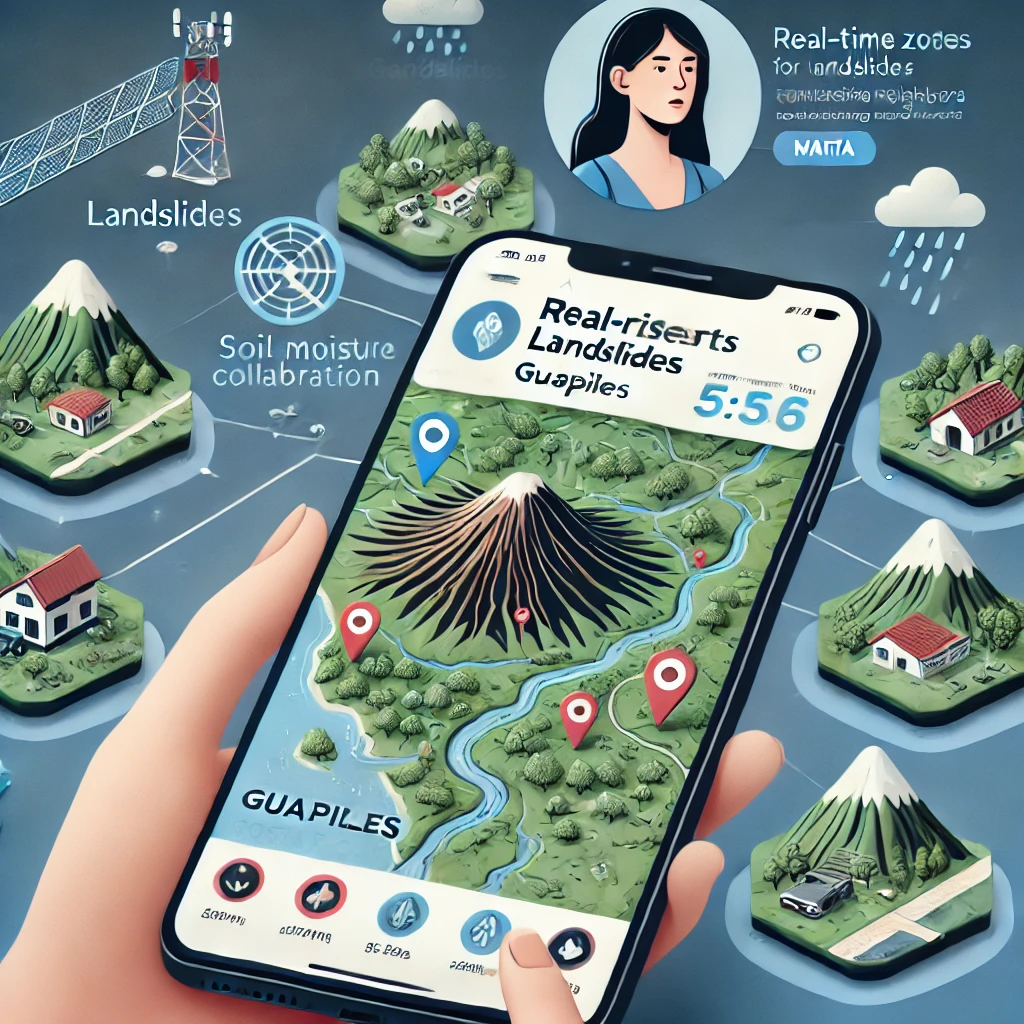

## **Conexión con Copernicus para Datos Satelitales**

Los datos satelitales de Copernicus son fundamentales para predecir deslizamientos de tierra, ya que proporcionan información clave sobre factores como la humedad del suelo, la cobertura vegetal (NDVI) y la topografía de una región. Estos datos ayudan a identificar áreas de alto riesgo, especialmente en terrenos con pendientes pronunciadas y zonas que han sido deforestadas o que están saturadas de agua. Mediante el análisis de estas variables, es posible anticipar la probabilidad de deslizamientos antes de que ocurran, permitiendo a las comunidades prepararse y tomar medidas preventivas.

El programa Copernicus ofrece acceso a imágenes y datos satelitales a través de varias misiones, como Sentinel-1 (radar para detección de movimiento de la tierra), Sentinel-2 (imágenes ópticas para monitoreo de vegetación y uso del suelo), y Sentinel-3 (monitoreo ambiental). La combinación de estos datos en tiempo real con información comunitaria permite a sistemas como AlertaLATAM emitir alertas precisas y mejorar la respuesta ante desastres.

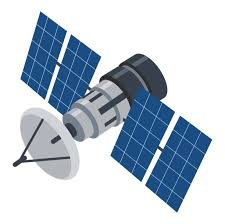


### Código para Autenticación y Conexión con Copernicus
Primero importamos las librerías necesarias.

Para acceder a los datos de Copernicus en Python, utilizaremos la API sentinelsat y openeo, que permiten conectarse al servidor de Copernicus y descargar los datos necesarios para el análisis. Aquí tienes un ejemplo de código para autenticarse y conectarse al servicio de Copernicus:

In [109]:
# Importar las librerías necesarias
import scipy
import numpy as np
import cv2

import openeo
from openeo.extra.spectral_indices import compute_indices

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import rasterio
from rasterio.plot import show
from skimage import filters

In [192]:
#Creamos la conexión
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [53]:
#definimos la ubicación, en este ejemplo: Guápiles, Costa Rica
extent = {
    "west": -83.7970,
    "south": 10.1668,
    "east": -83.6735,
    "north": 10.2830
}

### Paso 1: Cargar Colección de Datos de Sentinel

**NDVI (Índice de Vegetación)**

Utilizaremos Sentinel-2 para calcular el NDVI, que mide la densidad de vegetación en una región. Un bajo NDVI podría indicar áreas deforestadas o erosionadas, que son más vulnerables a deslizamientos.

In [54]:
# Carga de la colección Sentinel-2 para calcular el NDVI
datacube_ndvi = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=extent,  # Área de Guápiles definida anteriormente
    temporal_extent=["2024-01-01", "2024-12-31"],  # Rango de fechas de interés
    bands=["B04", "B08"]  # Bandas roja e infrarroja cercana para el cálculo de NDVI
)

# Guardamos los resultados si es necesario
ndvi = datacube_ndvi.ndvi(nir="B08", red="B04")

In [69]:
# Ejecuta el trabajo en la nube y descarga el archivo de NDVI
job = output.execute_batch("ndvi_guapiles.tif")


Preflight process graph validation failed: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))


0:00:00 Job 'j-241026b848374422bef4078a3b2764a7': send 'start'
0:00:13 Job 'j-241026b848374422bef4078a3b2764a7': created (progress 0%)
0:00:18 Job 'j-241026b848374422bef4078a3b2764a7': created (progress 0%)
0:00:25 Job 'j-241026b848374422bef4078a3b2764a7': created (progress 0%)
0:00:33 Job 'j-241026b848374422bef4078a3b2764a7': created (progress 0%)
0:00:43 Job 'j-241026b848374422bef4078a3b2764a7': created (progress 0%)
0:00:55 Job 'j-241026b848374422bef4078a3b2764a7': created (progress 0%)
0:01:11 Job 'j-241026b848374422bef4078a3b2764a7': finished (progress 100%)


### Paso 2: Cargar Datos de Humedad del Suelo

El índice de humedad del suelo es un indicador crítico para los deslizamientos, ya que un suelo saturado es más susceptible al deslizamiento. Para esto, usaremos Sentinel-1, que puede captar información sobre la humedad en áreas propensas a deslizamientos.

In [75]:
# Carga de la colección Sentinel-1 para humedad del suelo
datacube_soil_moisture = connection.load_collection(
    "SENTINEL1_GRD",  # Sentinel-1 en modo de imagen radar
    spatial_extent=extent,
    temporal_extent=["2024-01-01", "2024-12-31"],
    bands=["VV"]  # Polarización VV para análisis de humedad del suelo
)

# Procesamiento adicional podría incluir la normalización de los valores
soil_moisture = datacube_soil_moisture.mean_time()  # Obtiene la media de humedad en el tiempo

# Guardamos los resultados si es necesario

job = output.execute_batch("soil_moisture.tif")

0:00:00 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': send 'start'
0:00:13 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': created (progress 0%)
0:00:19 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': created (progress 0%)
0:00:25 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': created (progress 0%)
0:00:34 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': created (progress 0%)
0:00:44 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': running (progress N/A)
0:00:57 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': running (progress N/A)
0:01:13 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': running (progress N/A)
0:01:32 Job 'j-2410269a4b694ef5b0dd00e9a5cad6d8': finished (progress 100%)


### Paso 3: Datos de Topografía (elevación)

 Este conjunto es ideal para evaluar la inclinación y características del terreno, aspectos críticos para el análisis de deslizamientos de tierra.

In [60]:
# Carga de la colección COPERNICUS_30 para datos de elevación
datacube_elevation = connection.load_collection(
    "COPERNICUS_30",  # Conjunto de datos de modelo de elevación digital a 30m
    spatial_extent=extent  # Definimos el área de interés en Guápiles
)

# Procesamiento adicional (opcional) para obtener la media o hacer análisis de pendientes
elevation_data = datacube_elevation.reduce_dimension(dimension="t", reducer="mean")

# Guardamos los resultados si es necesario
output = elevation_data.save_result(format="GTiff")
job = output.execute_batch("elevation_guapiles.tif")


0:00:00 Job 'j-24102662dbda495bad5c1c245cc0bc35': send 'start'
0:00:12 Job 'j-24102662dbda495bad5c1c245cc0bc35': queued (progress 0%)
0:00:18 Job 'j-24102662dbda495bad5c1c245cc0bc35': queued (progress 0%)
0:00:24 Job 'j-24102662dbda495bad5c1c245cc0bc35': queued (progress 0%)
0:00:32 Job 'j-24102662dbda495bad5c1c245cc0bc35': queued (progress 0%)
0:00:42 Job 'j-24102662dbda495bad5c1c245cc0bc35': queued (progress 0%)
0:00:55 Job 'j-24102662dbda495bad5c1c245cc0bc35': queued (progress 0%)
0:01:11 Job 'j-24102662dbda495bad5c1c245cc0bc35': finished (progress 100%)


# Descripción de los Datos y Variables Clave para los Deslizamientos:


## 1. NDVI (Índice de Vegetación Normalizado)

Descripción: El NDVI mide la densidad y salud de la vegetación en una región. Se calcula usando las bandas roja e infrarroja de los datos satelitales, donde los valores más altos indican una vegetación densa y saludable, y los valores más bajos reflejan áreas de suelo desnudo o vegetación escasa.

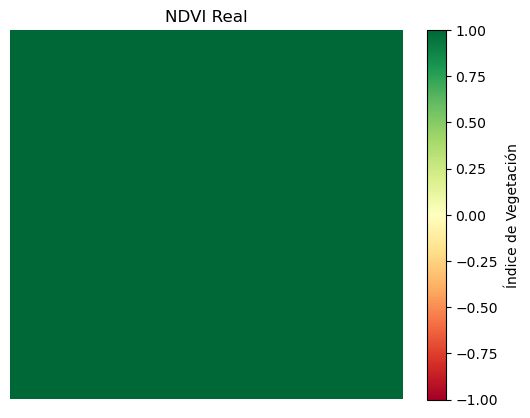

In [76]:
import rasterio
import matplotlib.pyplot as plt

# Cargar y visualizar el NDVI
with rasterio.open('ndvi_guapiles.tif') as src_ndvi:
    ndvi = src_ndvi.read(1)  # Lee la primera banda
    plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
    plt.title("NDVI Real")
    plt.colorbar(label="Índice de Vegetación")
    plt.axis("off")
    plt.show()

Visualización: Los valores de NDVI generalmente van de -1 a 1, donde:

Valores cercanos a 1 (en verde) representan vegetación densa.

Valores cercanos a 0 indican poca o ninguna vegetación.

Valores negativos (en rojo) indican agua u otras superficies no vegetadas.

Importancia para Deslizamientos: Las áreas con poca vegetación son más vulnerables a la erosión y, por lo tanto, tienen mayor riesgo de deslizamientos, ya que la vegetación estabiliza el suelo.

## Comparación de 2023-2024

Este análisis de NDVI permite evaluar cambios en la cobertura vegetal de Guápiles entre 2023 y 2024, lo cual es fundamental para identificar áreas de riesgo de deslizamientos. La vegetación ayuda a estabilizar el suelo, y su pérdida puede aumentar la vulnerabilidad a la erosión, especialmente en terrenos inclinados. Al monitorear el NDVI a lo largo del tiempo, es posible anticipar zonas en riesgo y planificar intervenciones preventivas para proteger tanto a la comunidad como al entorno natural.

In [111]:
# Define los períodos de tiempo
fecha_referencia = ["2023-01-01", "2023-01-15"]  # Imagen de referencia
fecha_reciente = ["2024-01-01", "2024-01-15"]    # Imagen reciente

## Definir el Rango Temporal
Definimos dos rangos de fechas, una imagen de referencia y otra más reciente para la comparación.

In [117]:
# Cargar imagen de referencia de Sentinel-2
datacube_ref = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=extent,
    temporal_extent=fecha_referencia,
    bands=["B04", "B08"]
)

# Cargar imagen reciente de Sentinel-2
datacube_new = connection.load_collection(
    "SENTINEL2_L2A",
    spatial_extent=extent,
    temporal_extent=fecha_reciente,
    bands=["B04", "B08"]
)


## Procesar las Imágenes para Comparar Cambios
Cálculo de NDVI: Calcula el NDVI para ambas imágenes y resta el NDVI reciente del NDVI de referencia para identificar áreas de cambio.
Exporta los Resultados.

## Cargar las Colecciones de Sentinel-2 para ambas Fechas
Usa Sentinel-2 para cargar imágenes en los dos períodos de tiempo. Selecciona las bandas B04 (roja) y B08 (infrarroja cercana) para el cálculo de NDVI.

In [161]:
# Reducir la dimensión temporal para consolidar en una sola imagen de NDVI
ndvi_2023_single = datacube_ref.ndvi(nir="B08", red="B04").reduce_dimension(dimension="t", reducer="mean")

# Guardar el NDVI reducido en un solo archivo GeoTIFF
output_2023 = ndvi_2023_single.save_result(format="GTiff")
job_2023 = output_2023.execute_batch("ndvi_2023_guapiles_single.tif")

0:00:00 Job 'j-2410264b04ea484c8a7082926bdfc777': send 'start'
0:00:13 Job 'j-2410264b04ea484c8a7082926bdfc777': created (progress 0%)
0:00:18 Job 'j-2410264b04ea484c8a7082926bdfc777': created (progress 0%)
0:00:25 Job 'j-2410264b04ea484c8a7082926bdfc777': created (progress 0%)
0:00:33 Job 'j-2410264b04ea484c8a7082926bdfc777': running (progress N/A)
0:00:43 Job 'j-2410264b04ea484c8a7082926bdfc777': running (progress N/A)
0:00:56 Job 'j-2410264b04ea484c8a7082926bdfc777': running (progress N/A)
0:01:11 Job 'j-2410264b04ea484c8a7082926bdfc777': running (progress N/A)
0:01:31 Job 'j-2410264b04ea484c8a7082926bdfc777': running (progress N/A)
0:01:55 Job 'j-2410264b04ea484c8a7082926bdfc777': finished (progress 100%)


In [162]:
# Cálculo del NDVI para 2024 con reducción temporal
ndvi_2024_single = datacube_new.ndvi(nir="B08", red="B04").reduce_dimension(dimension="t", reducer="mean")

# Guardar el archivo de NDVI consolidado para 2024
output_2024 = ndvi_2024_single.save_result(format="GTiff")
job_2024 = output_2024.execute_batch("ndvi_2024_guapiles_single.tif")

0:00:00 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': send 'start'
0:00:12 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': created (progress 0%)
0:00:17 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': created (progress 0%)
0:00:24 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': created (progress 0%)
0:00:32 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': running (progress N/A)
0:00:44 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': running (progress N/A)
0:00:57 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': running (progress N/A)
0:01:12 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': running (progress N/A)
0:01:32 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': running (progress N/A)
0:01:56 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': running (progress N/A)
0:02:26 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': running (progress N/A)
0:03:04 Job 'j-241026b0e1174003b8b0ba3a2e04fbde': finished (progress 100%)


## Visualizar los Cambios en NDVI
Después de que se haya descargado ndvi_change_guapiles.tif, puedes visualizar el cambio de NDVI en tu entorno de trabajo.

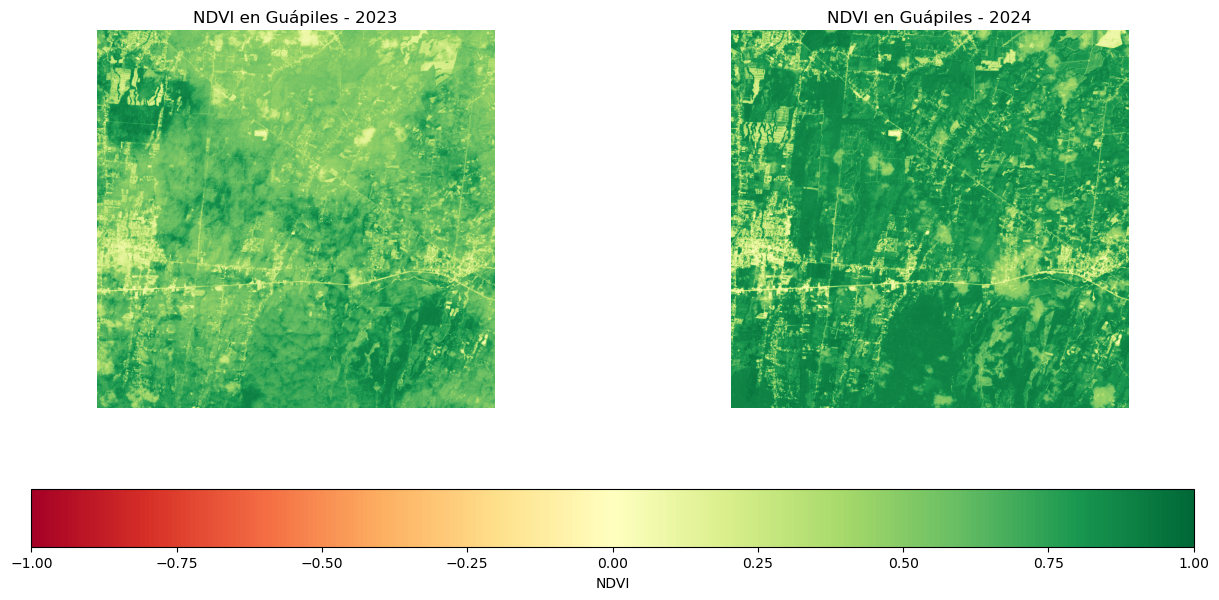

In [165]:
import rasterio
import matplotlib.pyplot as plt

# Cargar el NDVI de 2023
with rasterio.open("ndvi_2023_guapiles_single.tif") as src_2023:
    ndvi_2023 = src_2023.read(1)

# Cargar el NDVI de 2024
with rasterio.open("ndvi_2024_guapiles_single.tif") as src_2024:
    ndvi_2024 = src_2024.read(1)

# Crear dos gráficos para comparar ambos años
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Visualizar NDVI de 2023
ax1.imshow(ndvi_2023, cmap="RdYlGn", vmin=-1, vmax=1)
ax1.set_title("NDVI en Guápiles - 2023")
ax1.axis("off")

# Visualizar NDVI de 2024
ax2.imshow(ndvi_2024, cmap="RdYlGn", vmin=-1, vmax=1)
ax2.set_title("NDVI en Guápiles - 2024")
ax2.axis("off")

plt.colorbar(ax2.imshow(ndvi_2024, cmap="RdYlGn", vmin=-1, vmax=1), ax=[ax1, ax2], orientation="horizontal", label="NDVI")
plt.show()


**Áreas con Vegetación Densa:** La vegetación ayuda a estabilizar el suelo, por lo que las zonas con un NDVI alto (verde oscuro) tienen un menor riesgo de erosión. La estabilidad en el NDVI en estas áreas es positiva para la mitigación de deslizamientos.

**Zonas de Cambio Potencial:** Aunque los cambios son sutiles, cualquier área donde el NDVI disminuya entre 2023 y 2024 (aún no es visible en estos mapas de promedio) podría indicar pérdida de vegetación. Esto debería monitorearse, especialmente en áreas con pendientes pronunciadas.

Ambos mapas muestran una cobertura vegetal estable, con un ligero incremento en la vegetación en algunas áreas en 2024. Esto es positivo para la mitigación de riesgos de deslizamientos, ya que la vegetación contribuye a la estabilidad del suelo.

## 2. Humedad del Suelo

Descripción: La humedad del suelo mide el contenido de agua en la capa superficial del suelo. Este indicador es fundamental para evaluar la saturación del suelo, que aumenta con precipitaciones recientes o acumulación de agua.

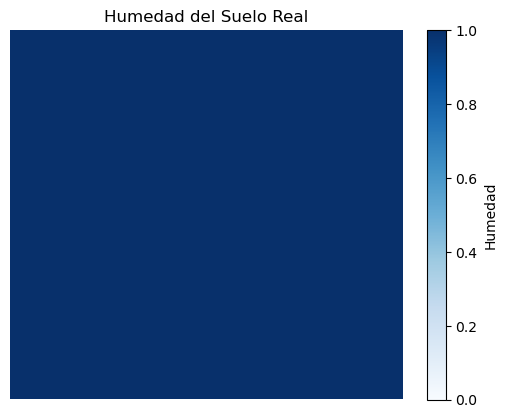

In [81]:
# Cargar y visualizar la humedad del suelo
with rasterio.open('soil_moisture.tif') as src_moisture:
    soil_moisture = src_moisture.read(1)  # Lee la primera banda
    plt.imshow(soil_moisture, cmap="Blues", vmin=0, vmax=1)
    plt.title("Humedad del Suelo Real")
    plt.colorbar(label="Humedad")
    plt.axis("off")
    plt.show()

Visualización: Los valores de humedad varían de 0 a 1, donde:

Valores cercanos a 1 (azules oscuros) representan suelos saturados de agua.

Valores más bajos indican suelos secos.

Importancia para Deslizamientos: El suelo saturado es más inestable, lo que aumenta la probabilidad de deslizamientos, especialmente en áreas inclinadas.

## 3. Topografía (Pendiente del Terreno)

Descripción: La topografía proporciona datos sobre la elevación del terreno. Calculando la pendiente, podemos identificar áreas con inclinaciones pronunciadas, que son más susceptibles a deslizamientos.


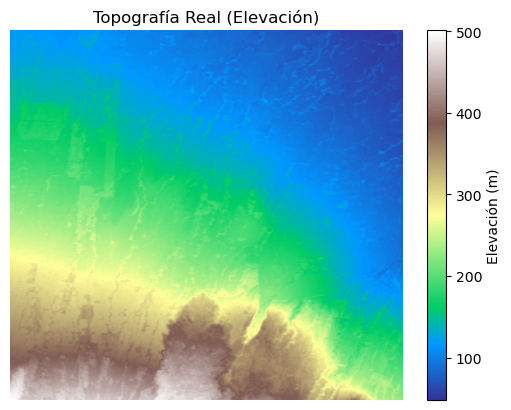

In [87]:
# Cargar y visualizar la topografía
with rasterio.open('elevation_guapiles.tif') as src_topo:
    elevation = src_topo.read(1)  # Lee la primera banda
    plt.imshow(elevation, cmap="terrain")
    plt.title("Topografía Real (Elevación)")
    plt.colorbar(label="Elevación (m)")
    plt.axis("off")
    plt.show()

Visualización: Los valores de pendiente (slope) indican la inclinación del terreno:

Áreas con alta pendiente (colores más oscuros) tienen una inclinación pronunciada.

Áreas con baja pendiente son más planas y generalmente tienen menos riesgo de deslizamiento.

Importancia para Deslizamientos: Las áreas con pendiente elevada y suelo saturado son especialmente vulnerables, ya que la combinación de agua y gravedad facilita el movimiento de tierra.

# Incorporación de Foto reportes Comunitarios:

**Proceso de Contribución Comunitaria en AlertaLATAM**

En esta sección, exploraremos cómo los miembros de la comunidad juegan un papel crucial en AlertaLATAM al contribuir con **información local**. A través de la aplicación, los vecinos pueden subir fotos de grietas en el suelo, deslizamientos menores o carreteras en condiciones inestables. Estas imágenes complementan los datos satelitales de Copernicus, ofreciendo detalles en **tiempo real** sobre el terreno que los satélites podrían no captar de inmediato.

**Proceso de Contribución Comunitaria**

**Captura de Evidencia:** Cuando los vecinos observan grietas o zonas inestables en sus alrededores, pueden tomar fotografías desde la aplicación de AlertaLATAM. Esto puede incluir:

- Grietas en el suelo que indican movimientos de tierra incipientes.
- Carreteras y caminos que muestran signos de desgaste o inestabilidad, especialmente después de lluvias intensas.
- Áreas donde se acumula agua, aumentando el riesgo de saturación del suelo.
  
**Etiqueta y Descripción:** Al subir la foto, los usuarios pueden agregar etiquetas y una breve descripción, como "grieta en el camino principal" o "suelo inestable cerca de la colina". Esta información permite clasificar y organizar las imágenes para el análisis.

**Integración con Datos Satelitales:** Las fotos se integran con los datos satelitales, proporcionando detalles visuales específicos de las áreas de riesgo. Los algoritmos de AlertaLATAM pueden analizar estas imágenes junto con datos de NDVI, humedad y topografía, generando un modelo más completo del estado del terreno.

**Beneficios para la Comunidad**

Gracias a estas contribuciones, AlertaLATAM ofrece alertas personalizadas y recomendaciones de acción más precisas. Los reportes locales no solo alertan a los vecinos de riesgos potenciales, sino que también ayudan a las autoridades locales a responder rápidamente, tomando decisiones informadas para proteger a las comunidades en zonas vulnerables.

## Cargar y Preprocesar las Imágenes de los Usuarios
Cargamos una imagen de referencia (imagen sin derrumbes en la carretera) y una imagen reciente del mismo lugar, proporcionada por el usuario. La idea es comparar estas dos imágenes para identificar cambios visibles.

In [232]:
# Cargar la imagen de referencia y la imagen reciente
img_ref = cv2.imread('imagen_referencia.webp', cv2.IMREAD_GRAYSCALE)
img_new = cv2.imread('imagen_nueva.webp', cv2.IMREAD_GRAYSCALE)

In [234]:
# Verificar que las imágenes se hayan cargado
if img_ref is None or img_new is None:
    print("Error: No se pudo cargar una de las imágenes. Verifica las rutas.")
else:
    # Desenfoque Gaussiano para reducir el ruido
    img_ref_blur = cv2.GaussianBlur(img_ref, (5, 5), 0)
    img_new_blur = cv2.GaussianBlur(img_new, (5, 5), 0)

## Procesar las Imágenes para Resaltar Cambios
Aplicar Desenfoque: Esto ayuda a reducir el ruido y enfocar los cambios más grandes, como piedras o tierra que obstruye el camino.
Calcular la diferencia entre las Imágenes: La diferencia resaltará los cambios visibles en el terreno.

In [236]:
# Desenfoque Gaussiano para reducir el ruido
img_ref_blur = cv2.GaussianBlur(img_ref, (5, 5), 0)
img_new_blur = cv2.GaussianBlur(img_new, (5, 5), 0)

# Calcular la diferencia entre la imagen nueva y la de referencia
diff = cv2.absdiff(img_ref_blur, img_new_blur)

## Binarizar la Imagen para Destacar las Grietas
Aplica un umbral para convertir la imagen de diferencia en una imagen binaria, resaltando las áreas donde hay cambios.

In [238]:
# Umbralización para binarizar la imagen
_, diff_bin = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

## Identificar Contornos en las Áreas de Cambio
Los contornos ayudan a identificar y delimitar las áreas de cambio, como carreteras obstruidas.

In [240]:
# Encontrar contornos en las áreas de cambio
contours, _ = cv2.findContours(diff_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Dibujar los contornos sobre la imagen nueva
img_contours = cv2.cvtColor(img_new, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)


array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [ 12,  12,  12],
        ...,
        [ 92,  92,  92],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[ 27,  27,  27],
        [ 13,  13,  13],
        [ 21,  21,  21],
        ...,
        [ 54,  54,  54],
        [ 46,  46,  46],
        [ 40,  40,  40]],

       [[ 17,  17,  17],
        [ 31,  31,  31],
        [ 30,  30,  30],
        ...,
        [ 57,  57,  57],
        [ 48,  48,  48],
        [ 35,  35,  35]],

       [[ 28,  28,  28],
        [ 23,  23,  23],
        [ 34,  34,  34],
        ...,
        [ 51,  51,  51],
        [ 48,  48,  48],
        [ 66,  66,  66]]

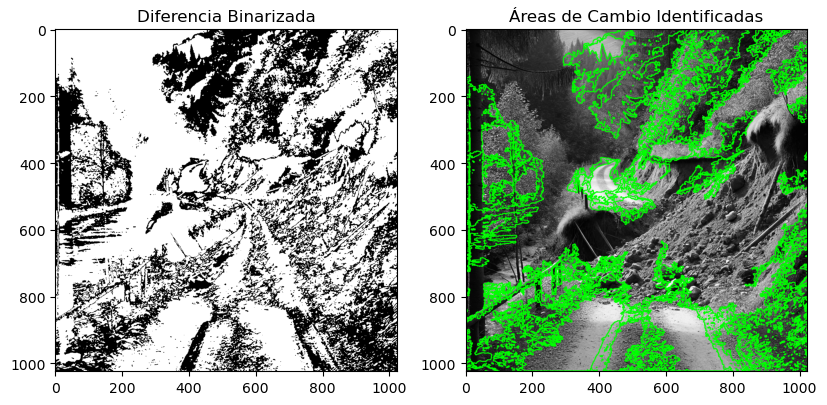

In [242]:
# Mostrar los resultados
plt.figure(figsize=(15, 5))

# Imagen de diferencia binarizada
plt.subplot(1, 3, 1)
plt.imshow(diff_bin, cmap='gray')
plt.title("Diferencia Binarizada")

# Imagen con contornos dibujados
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title("Áreas de Cambio Identificadas")

plt.show()

Este análisis indica que ha habido una alteración significativa en el camino, probablemente debido a un derrumbe o desplazamiento de tierra. La herramienta de detección de contornos ha capturado estas áreas de cambio, lo cual es útil para:

**Monitoreo de riesgos:** Identificar áreas afectadas ayuda a tomar decisiones para cerrar el camino o planear acciones de mantenimiento.

**Evaluación del impacto:** Permite cuantificar las áreas de cambio y evaluar la magnitud del derrumbe, lo que podría ser importante para la evaluación de daños y futuros estudios de mitigación.

**Alertas tempranas:** Este tipo de procesamiento puede implementarse en sistemas de monitoreo en tiempo real para alertar a las autoridades sobre cambios peligrosos en caminos o senderos en áreas propensas a deslizamientos.

La diferencia binarizada y los contornos de cambio indican claramente que el terreno y el camino han sido afectados, y que se pueden observar patrones específicos en las áreas de cambio que se deben estudiar más a fondo para evaluar el riesgo de futuros derrumbes.

# Conclusión

En muchas comunidades rurales situadas en zonas montañosas y propensas a deslizamientos de tierra, los residentes han enfrentado durante años la incertidumbre de vivir en terrenos inestables, especialmente en temporada de lluvias. Sin embargo, gracias a la implementación de AlertaLATAM, estas comunidades experimentan un cambio significativo.

La combinación de datos de Copernicus, como la topografía, el índice de vegetación (NDVI) y la humedad del suelo, junto con las contribuciones de los propios miembros de la comunidad, ha permitido detectar cambios en el terreno de manera precisa y oportuna. Los habitantes ahora pueden tomar fotografías de grietas o alteraciones en el suelo, contribuyendo con información valiosa que complementa los datos satelitales. Esta colaboración les da un **papel activo** en la protección de su entorno, permitiéndoles no solo observar, sino también comprender mejor los riesgos que los rodean.

**Reflexión sobre el Impacto de AlertaLATAM**

La implementación de AlertaLATAM ha demostrado ser un catalizador de cambio en comunidades vulnerables. Esta herramienta no solo proporciona datos técnicos y científicos, sino que también empodera a las personas a través de la ciencia ciudadana. Con acceso a información en tiempo real y la posibilidad de contribuir con sus propias observaciones, los habitantes pueden anticiparse a situaciones de riesgo, tomar decisiones informadas y coordinar acciones preventivas.

La capacidad de anticiparse a un deslizamiento o cualquier otro desastre natural reduce significativamente el riesgo de pérdidas humanas y materiales. AlertaLATAM convierte a cada habitante en un **agente activo** de su entorno, fomentando una cultura de prevención y resiliencia. Las comunidades ahora se sienten mejor preparadas para enfrentar los desafíos del terreno y pueden, juntos, **proteger** lo que más valoran: **su hogar y su seguridad.**

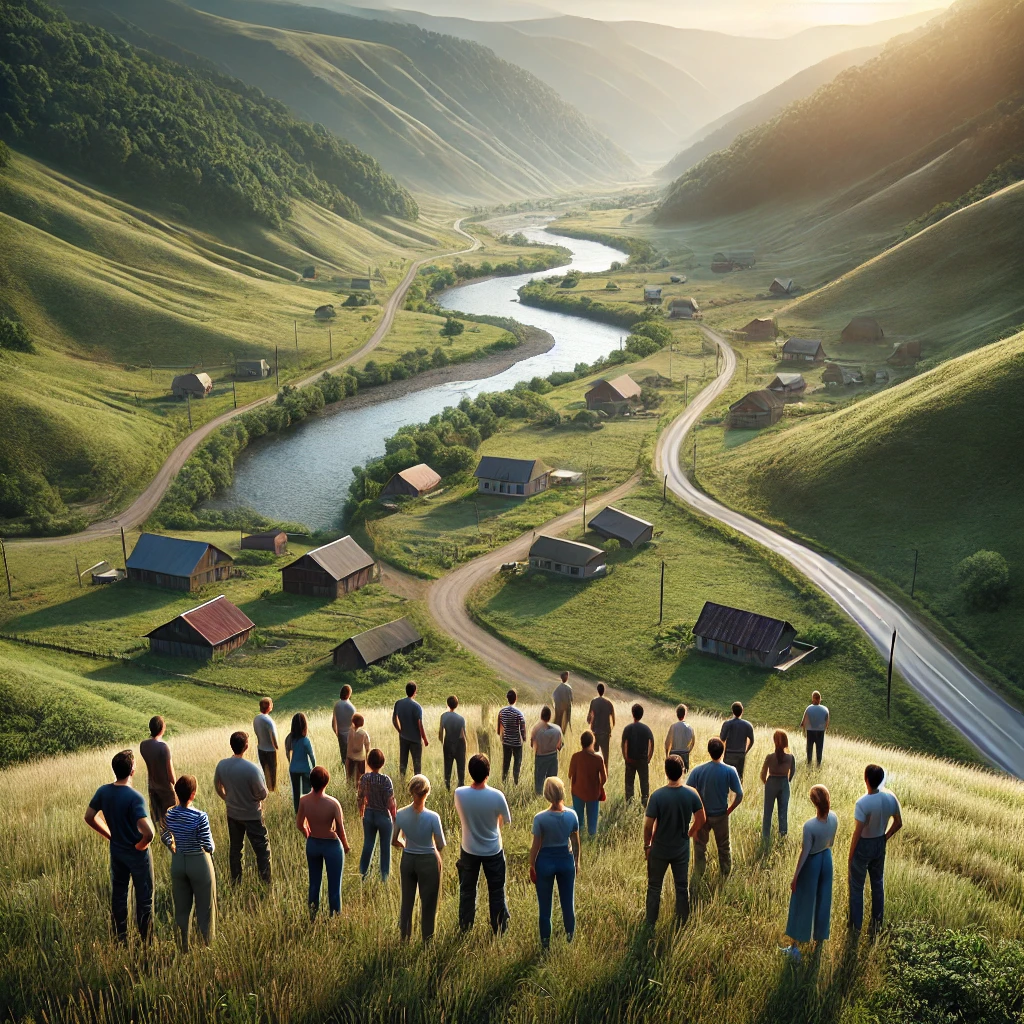

## Referencias

1. Sepúlveda, S. A., & Petley, D. N. (2015). *Regional trends and controlling factors of fatal landslides in Latin America and the Caribbean*. Natural Hazards and Earth System Sciences, 15(8), 1821-1833. Disponible en: [https://doi.org/10.5194/nhess-15-1821-2015](https://doi.org/10.5194/nhess-15-1821-2015)
23. Climate Attribution. (2023). *State of the Climate in Latin America and the Caribbean 2022*. Disponible en: [https://climateattribution.org/resources/state-of-the-climate-in-latin-america-and-the-caribbean-2022/](https://climateattribution.org/resources/state-of-the-climate-in-latin-america-and-the-caribbean-2022/)
